In [21]:
# pip install reportlab
# pip install tdt
# pip install opencv-python

### 1. FP data preprocessing

In [22]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function
import ReportGeneration # import User-defined function
import VideoFunctions # import User-defined function

In [23]:
Raw_data_path =  r'D:\DataAtCSBD\FiberPhotometry\TDT_Tank' #The folder where the TDT tanks are saved
Recorded_date = '250305_B6' #The date of the recording

Base_folder = r'D:\DataAtCSBD\FiberPhotometry\ProcessedData' #The folder where the processed data will be saved
Batch_folder = '250305_B6' 


In [24]:
Datafolder_list = ['G06_002-250305-152109', 'G06_001-250305-174822']
Animal_ID_list = ['B6_G06_002', 'B6_G06_001']
session_list = ['PI']

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_002\PI\Preprocessing already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_002\PI\Preprocessing.
read from t=0s to t=5486.57s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250305_B6\G06_002-250305-152109


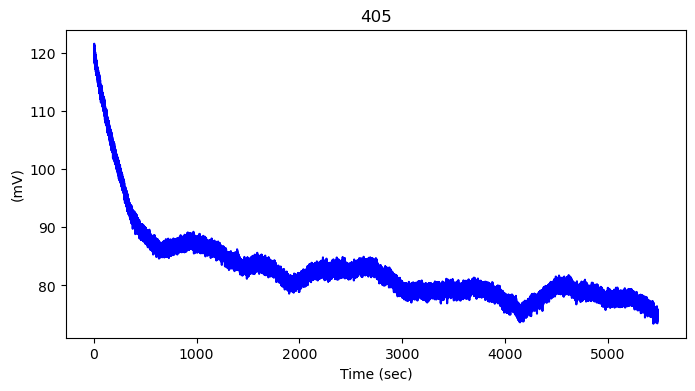

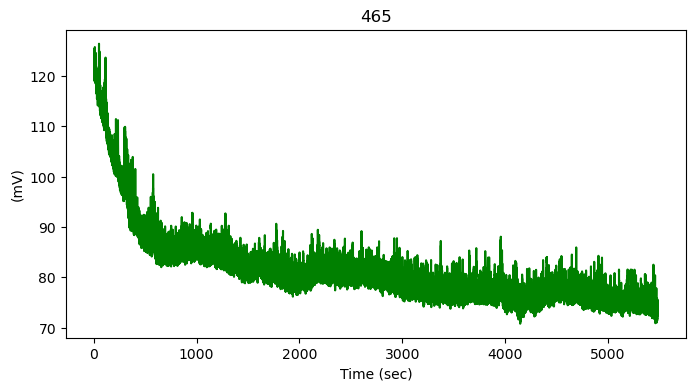

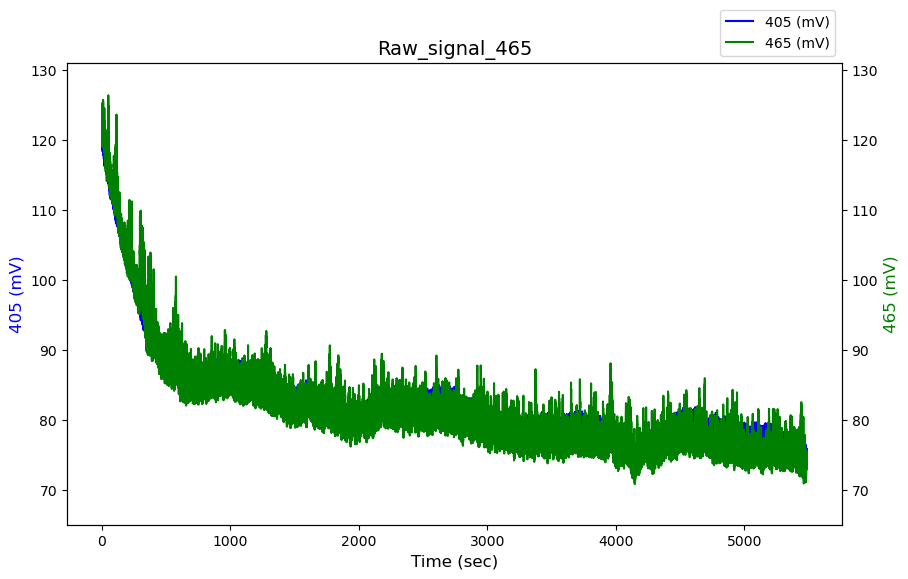

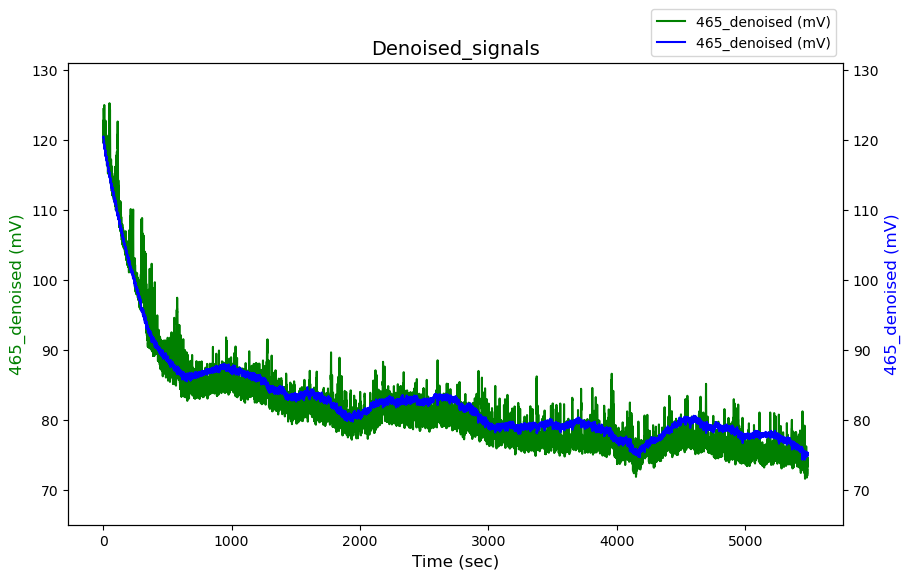

Slope    : 0.489
R-squared: 0.055


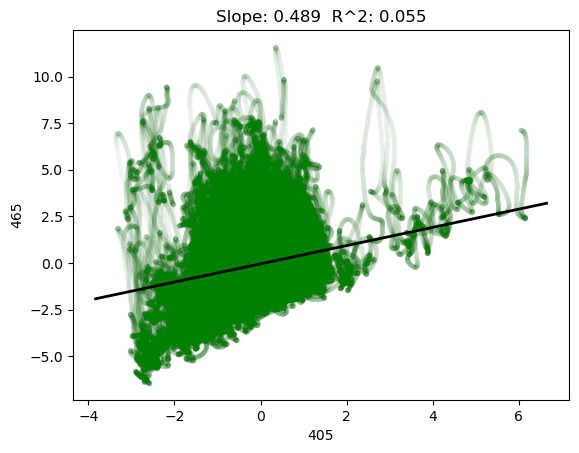

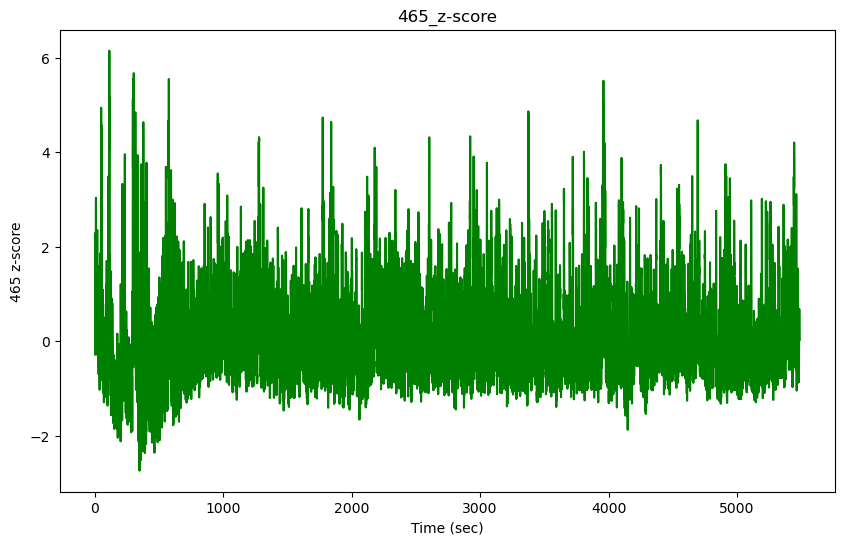

read from t=0s to t=5486.57s
        onset      offset
0  313.961016  314.000993
1  333.491891  333.531868
2  366.220897  366.360980
3  391.950659  393.010867
4  415.519534  416.579743
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_001\PI\Preprocessing already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_001\PI\Preprocessing.
read from t=0s to t=5545.17s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\250305_B6\G06_001-250305-174822


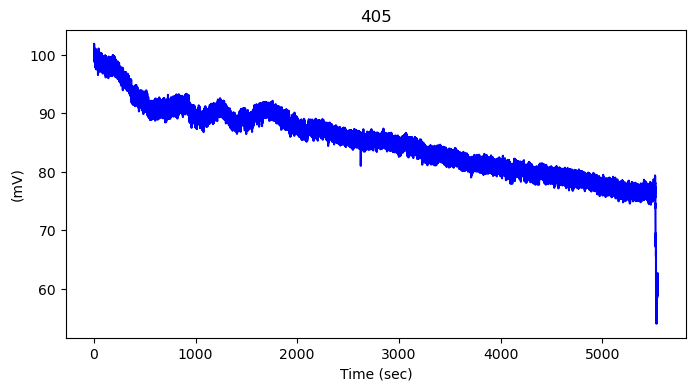

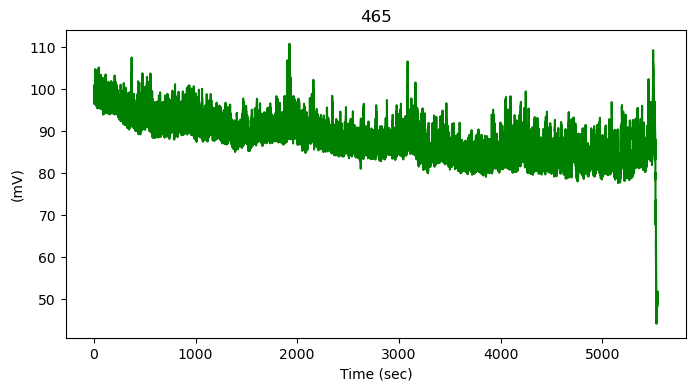

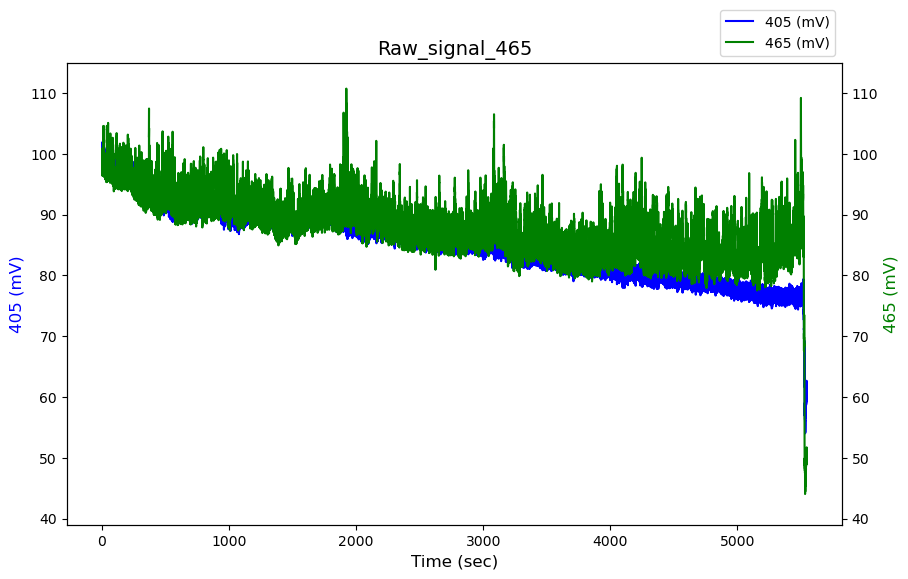

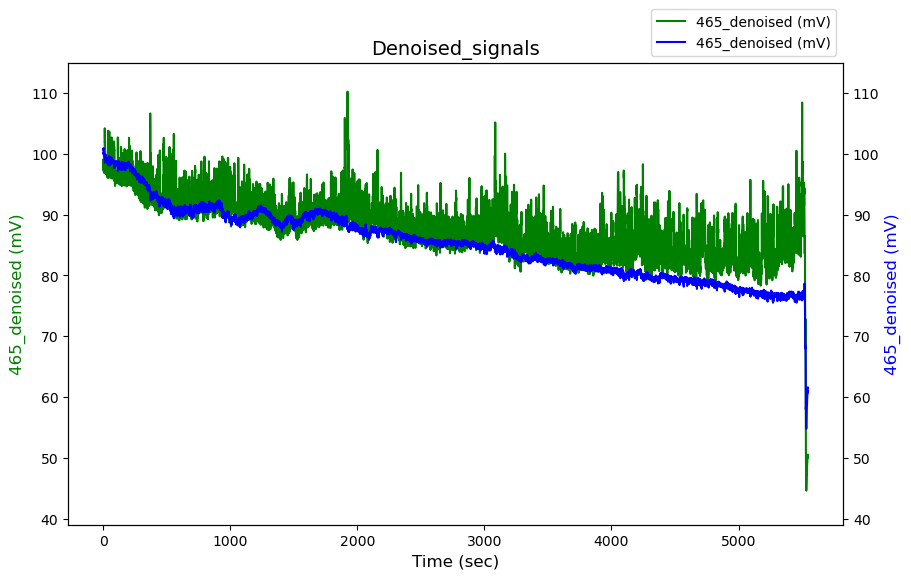

Slope    : 2.052
R-squared: 0.454


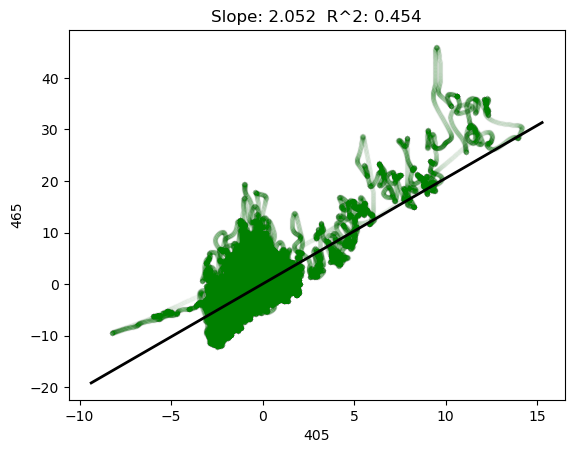

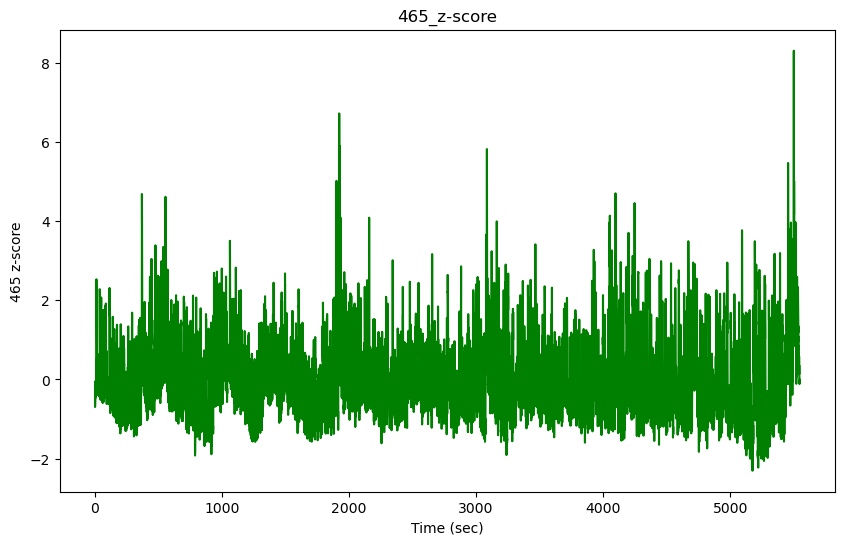

read from t=0s to t=5545.17s
        onset      offset
0  276.318940  276.358917
1  295.811804  295.851945
2  328.540155  328.680238
3  354.273193  355.333238
4  377.864351  378.924396


In [25]:
for i, folder in enumerate(Datafolder_list):
                TDT_Tanks_path = os.path.join(Raw_data_path, Recorded_date, folder)
                FPFunctions.FP_preprocessing_1ch(Tank_path=TDT_Tanks_path,
                                Dest_folder = os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0],'Preprocessing'),
                                Detrending_method= 'Highpass_filter',  
                                Use_CamTick=False,
                                FPS=25, 
                                Rec_duration=600)
                
                FPFunctions.Eport_Epoch_Info(TDT_Tank_path=TDT_Tanks_path, 
                                                    REF_EPOC='PC1_',
                                                    Time4Exclude=2, 
                                                    destfolder=os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Epoch_Info'),
                                                    SaveData=True)
                
                image_paths = [os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Raw_signal_465.png'),
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Denoised_signals.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_405_465_correlation.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_465_z-score.png')]

                comments = ["Figure1. Raw signals",
                            "Figure2. Denoised signals",
                            "Figure3. Correlation between 405 and 465",
                            "Figure4. 465 z-score"]

                ReportGeneration.FP_preprocessing(output_path=os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0]), 
                                                title=f'{Animal_ID_list[i]}_{session_list[0]}', 
                                                image_paths=image_paths, 
                                                comments=comments)

### 2. Peak Analysis for FP signals

In [26]:
# import os   # import os module
# import FPFunctions # import User-defined function
# import FileFunctions # import User-defined function

In [27]:
# root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData\250306_B6"
# sub_folder_list = FileFunctions.Grab_folder_names_in_folder(root_folder)
# sub_folder_list1 = ['PI'] #The list of session names
# print(sub_folder_list)

In [28]:
# for sub_folder in sub_folder_list:
#     for sub_folder1 in sub_folder_list1:
#         destfolder = os.path.join(root_folder, sub_folder, sub_folder1)
#         FileFunctions.Set_WD(destfolder)
#         FPFunctions.Peak_Analysis(pkl_path=os.path.join(destfolder, 'Preprocessing', 'Final_table_raw_trace.pkl'), 
#                                 prominence_thres= 2, 
#                                 amplitude_thres= 4,
#                                 FPS= 25, 
#                                 pre_window_len= 3, 
#                                 post_window_len= 3, 
#                                 SavePlots = True, 
#                                 SaveData = True, 
#                                 SaveVideos= False,
#                                 video_path=os.path.join(destfolder, f'{sub_folder}_{sub_folder1}.avi'))
        # VideoFunctions.Generate_montage(input_folder=os.path.join(destfolder, 'Peak_Analysis', 'spike_detection'),
        #                                 output_filename='Motatge_spikes.mp4',
        #                                 rows=3,
        #                                 cols=5,
        #                                 frame_rate=25,
        #                                 duration=6,
        #                                 codec='mp4v',
        #                                 popups=[('Firing', 3 , 2)],
        #                                 scale_factor = 0.5) 

### 3. Epoch Analysis

In [29]:
import pandas as pd
import numpy as np
import pylab as plt

In [30]:
df_ppi = pd.read_csv(r"C:\Users\YGKim_IBS\Downloads\PPI_sequence.csv", header = None)
df_ppi.columns = ['protocol', '', '', '', '']
ppi_protocol = df_ppi['protocol'].unique()
ppi = np.array(df_ppi['protocol'])
# print(df_ppi)
# print(df_ppi.shape)
print(ppi_protocol)
# print(ppi)

['Pulse alone 120' 'PPI 75 ON' 'PPI 80 OFF' 'PPI 80 ON' 'PPI 75 OFF']


In [31]:
ppi_sequence_list = []
ppi_sequence_dic = {}
ppi_sequence_name = ['pulse_only_120', 'ppi_75_on', 'ppi_80_off', 'ppi_80_on', 'ppi_75_off']

for i, a in enumerate(ppi_protocol):
    globals()['{}'.format(ppi_sequence_name[i])] = list(np.where(ppi == a)[0])
    ppi_sequence_list.append('{}'.format(ppi_sequence_name[i]))
    print(globals()['{}'.format(ppi_sequence_name[i])])
    ppi_sequence_dic['{}'.format(ppi_sequence_name[i])] = list(np.where(ppi == a)[0])

[0, 1, 5, 6, 13, 14, 15, 22, 24, 35, 40, 45, 47, 48, 51, 65, 67, 78, 86, 90, 98, 101, 126, 137, 138, 140, 142, 147, 148, 151, 157, 159, 161, 171, 172, 175, 177, 181, 192, 193]
[2, 16, 17, 18, 23, 30, 33, 34, 38, 46, 50, 52, 53, 57, 60, 72, 75, 81, 94, 100, 102, 105, 109, 111, 115, 116, 118, 119, 121, 125, 141, 143, 144, 152, 158, 169, 179, 184, 188, 198]
[3, 4, 7, 10, 20, 21, 26, 29, 31, 37, 41, 54, 63, 68, 69, 71, 74, 77, 79, 80, 85, 88, 89, 96, 97, 108, 110, 112, 113, 120, 122, 129, 139, 146, 156, 160, 165, 186, 187, 191]
[8, 11, 12, 19, 44, 55, 56, 58, 61, 62, 64, 66, 70, 73, 82, 83, 91, 99, 104, 106, 117, 123, 124, 127, 130, 131, 133, 134, 135, 136, 145, 155, 162, 167, 174, 176, 180, 189, 195, 196]
[9, 25, 27, 28, 32, 36, 39, 42, 43, 49, 59, 76, 84, 87, 92, 93, 95, 103, 107, 114, 128, 132, 149, 150, 153, 154, 163, 164, 166, 168, 170, 173, 178, 182, 183, 185, 190, 194, 197, 199]


Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_002\PI\Epoch_Analysis already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_002\PI\Epoch_Analysis.


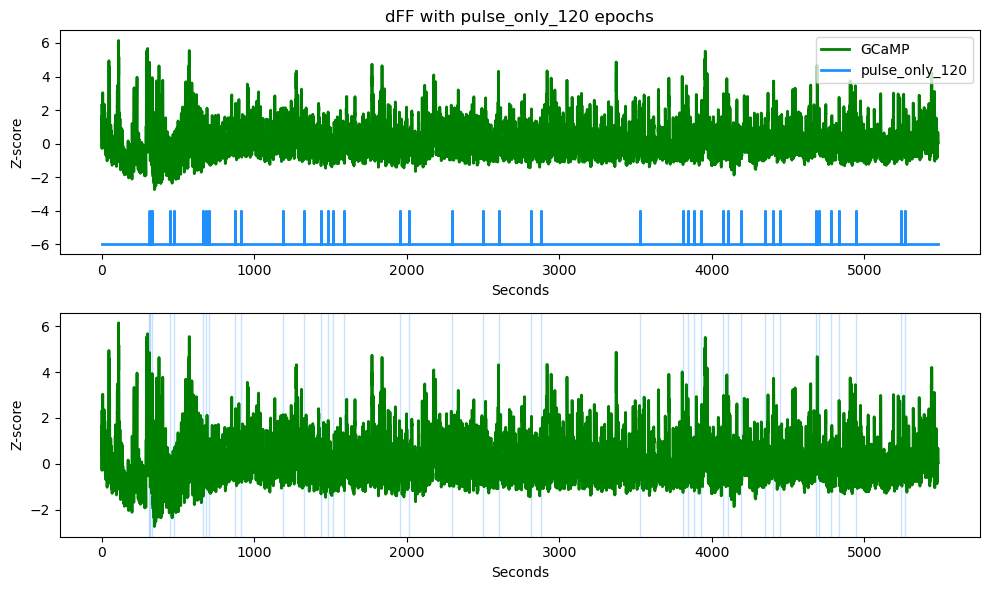

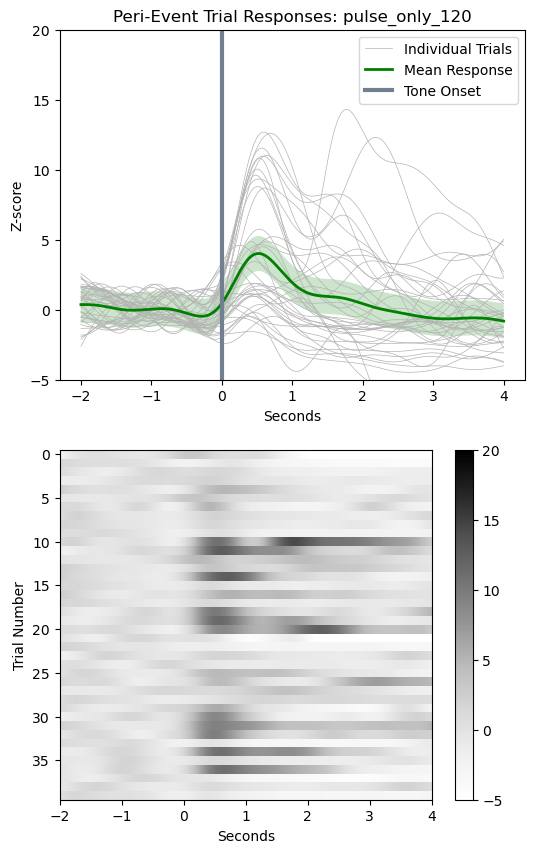

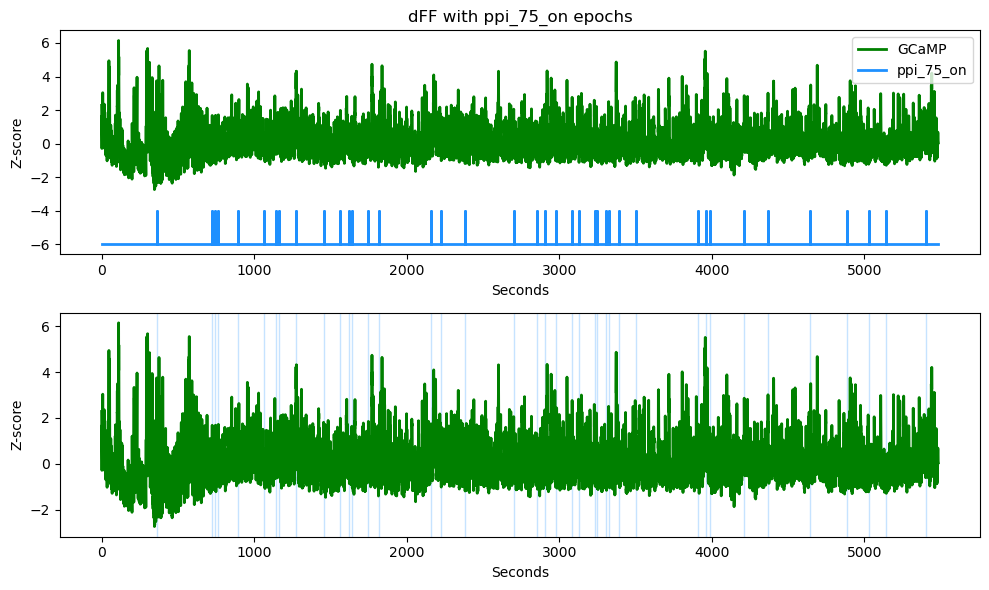

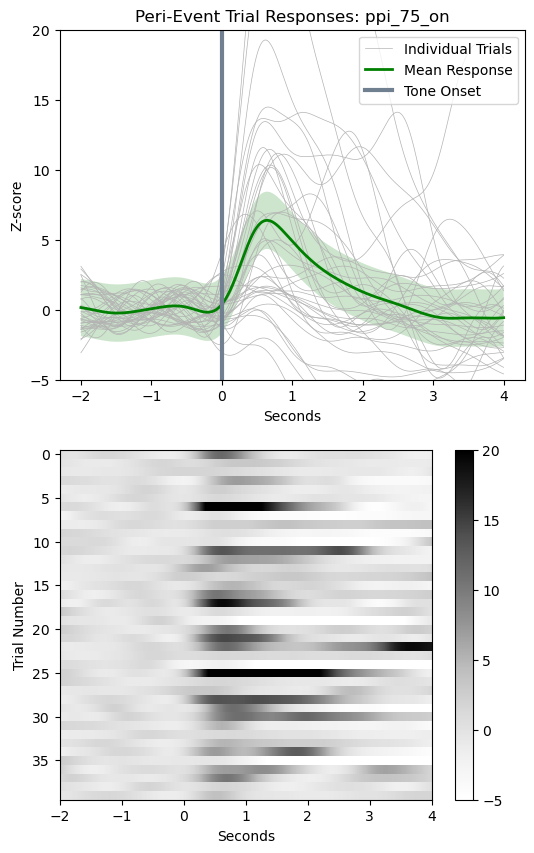

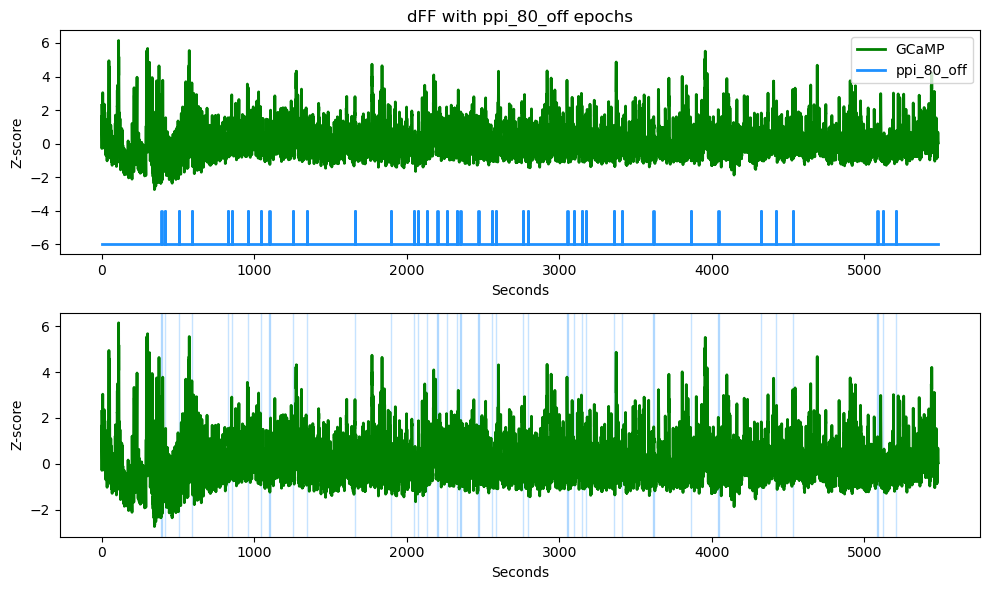

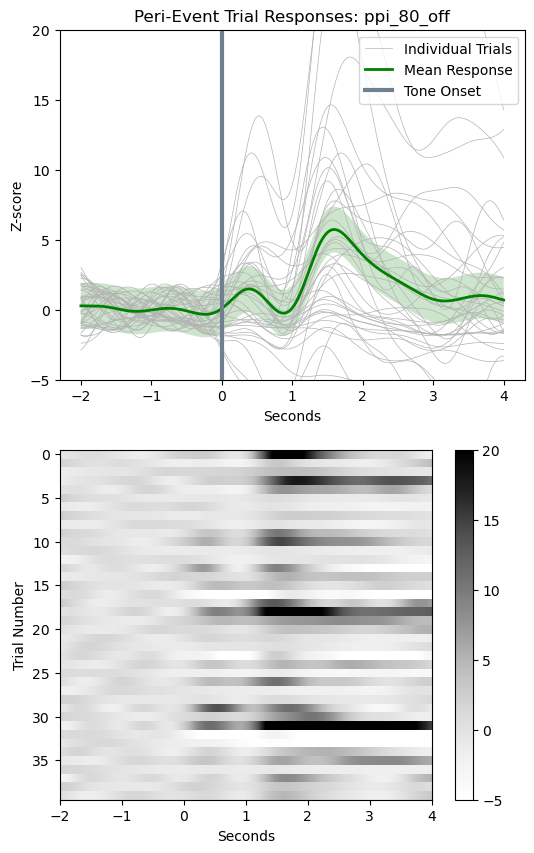

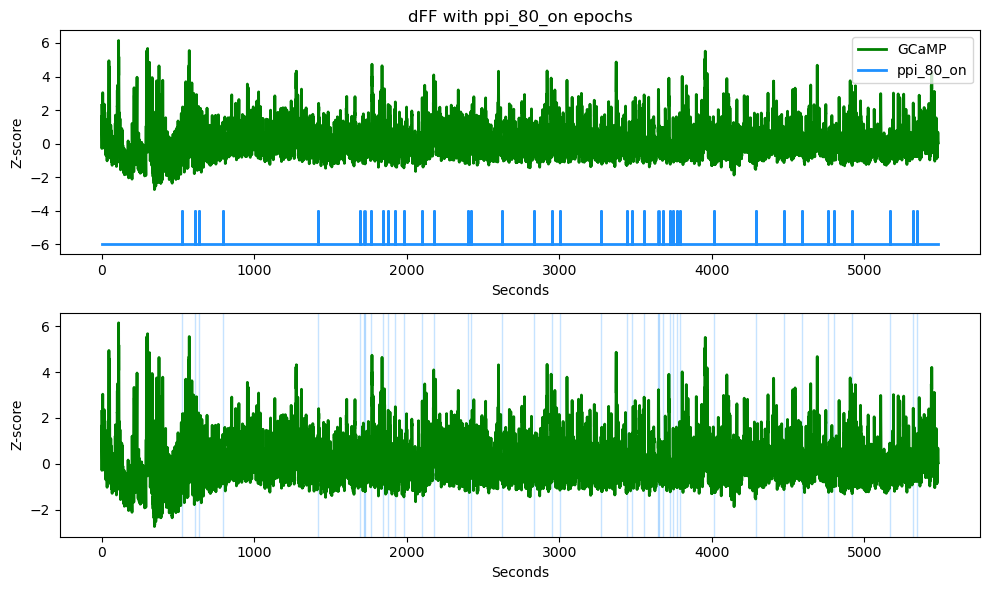

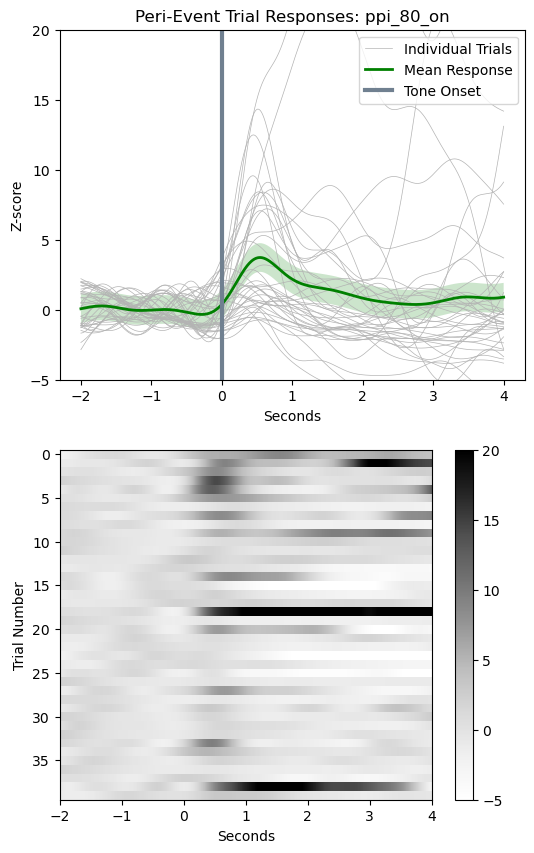

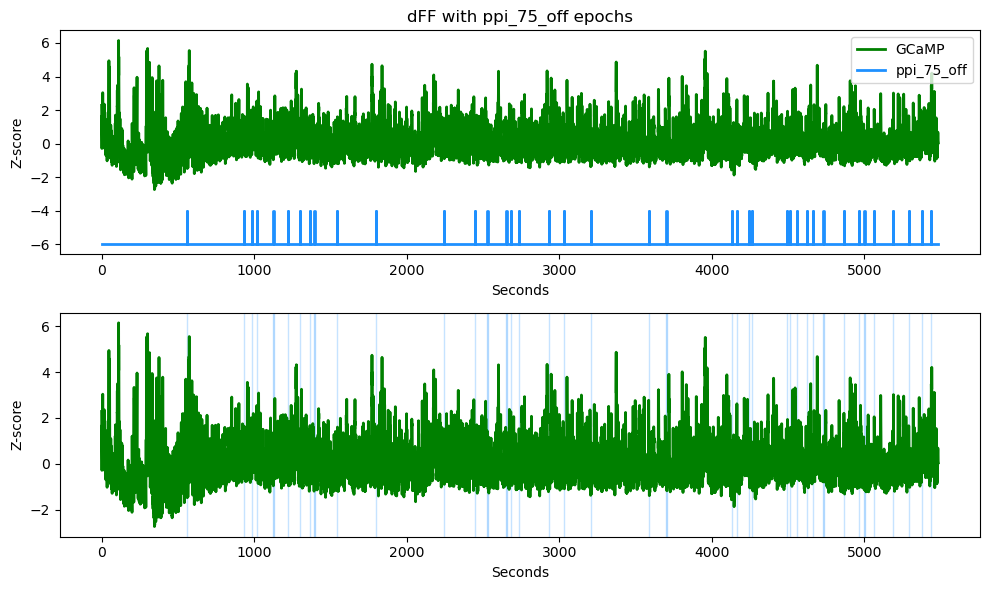

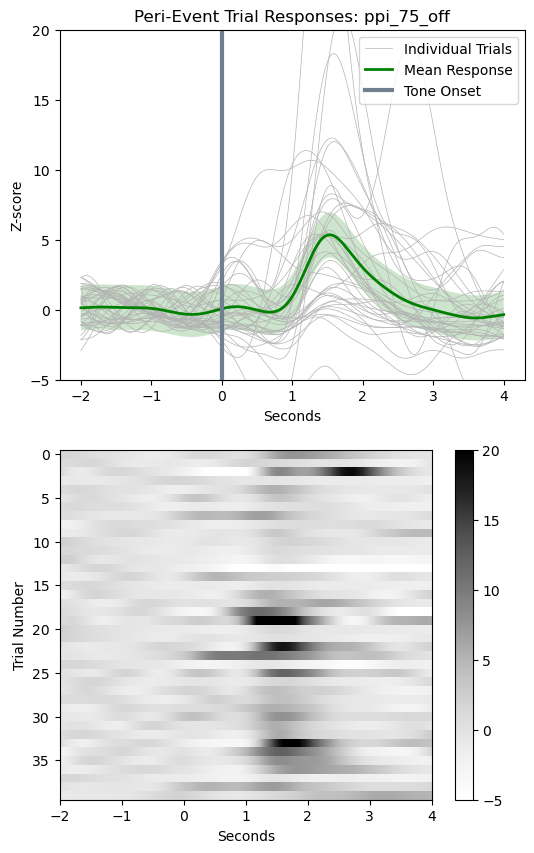

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_001\PI\Epoch_Analysis already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\250305_B6\B6_G06_001\PI\Epoch_Analysis.


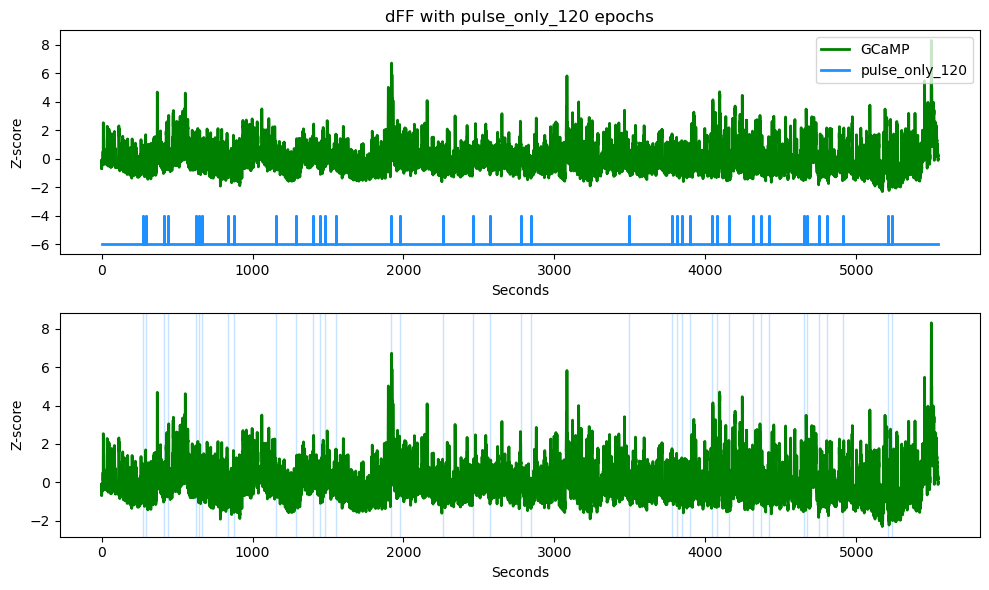

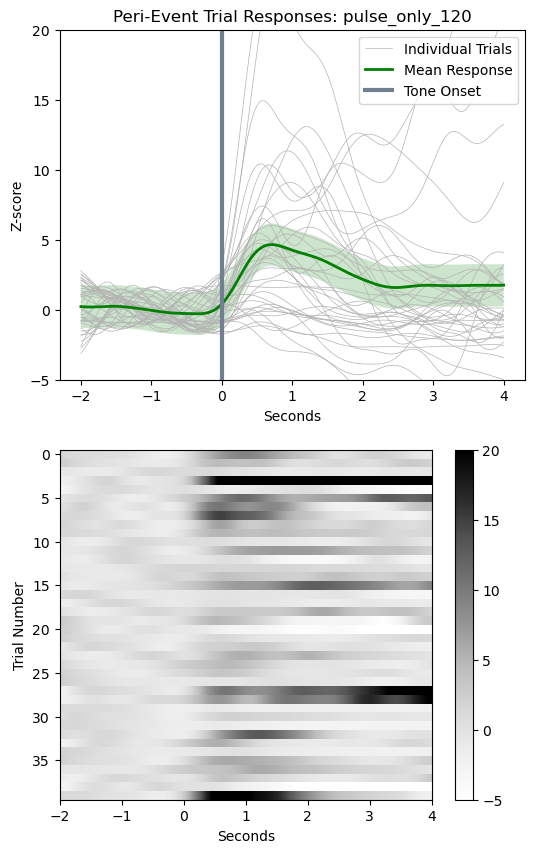

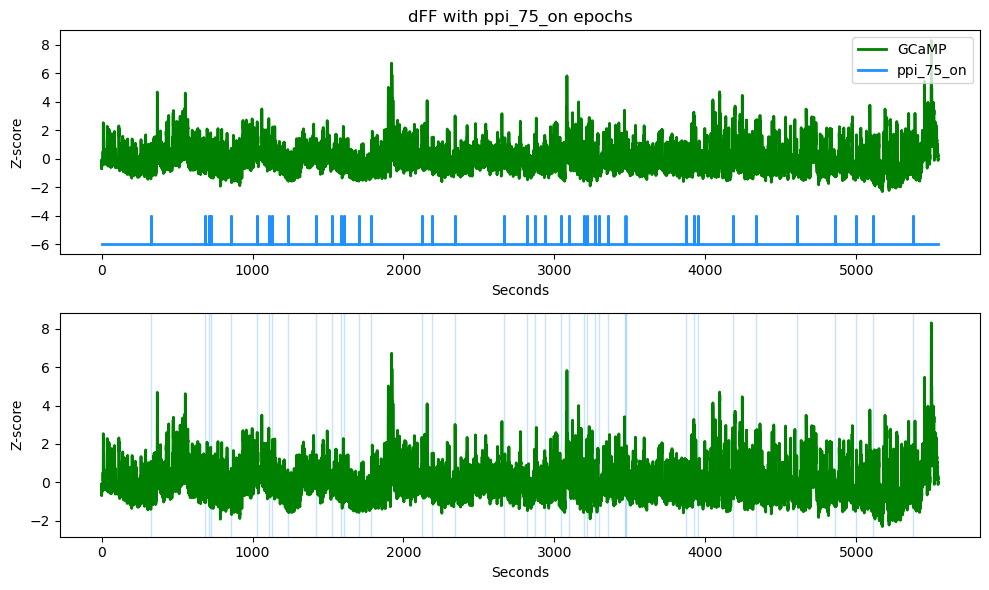

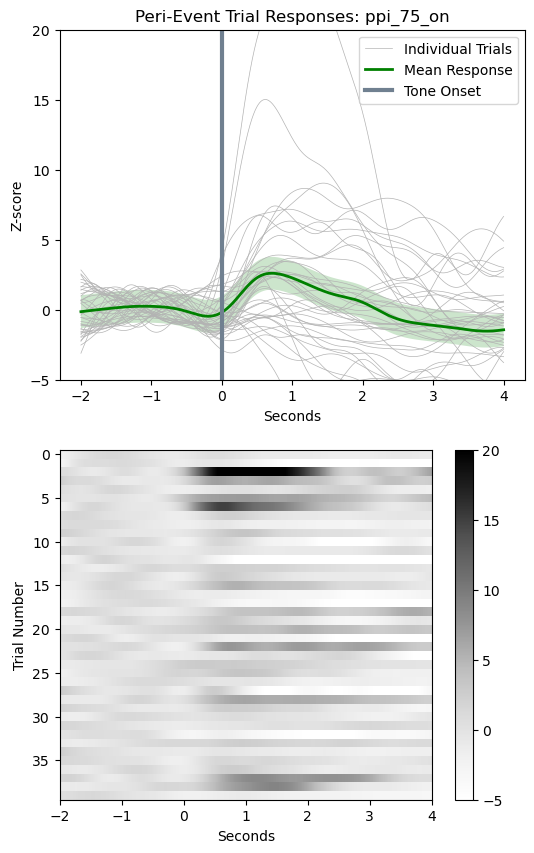

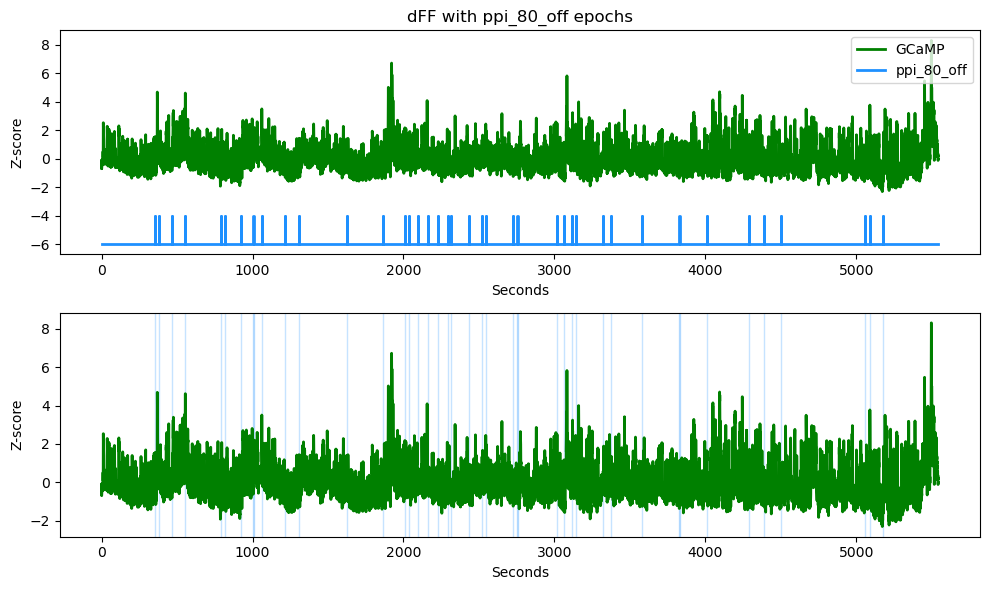

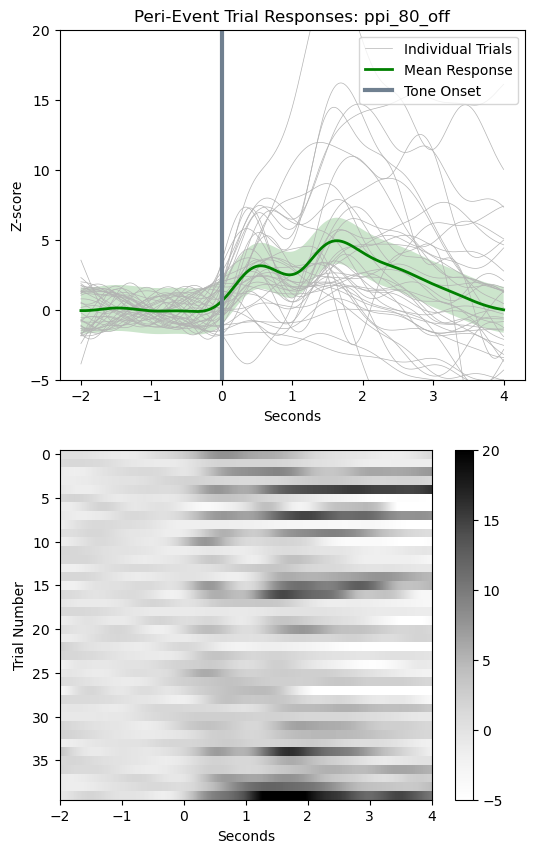

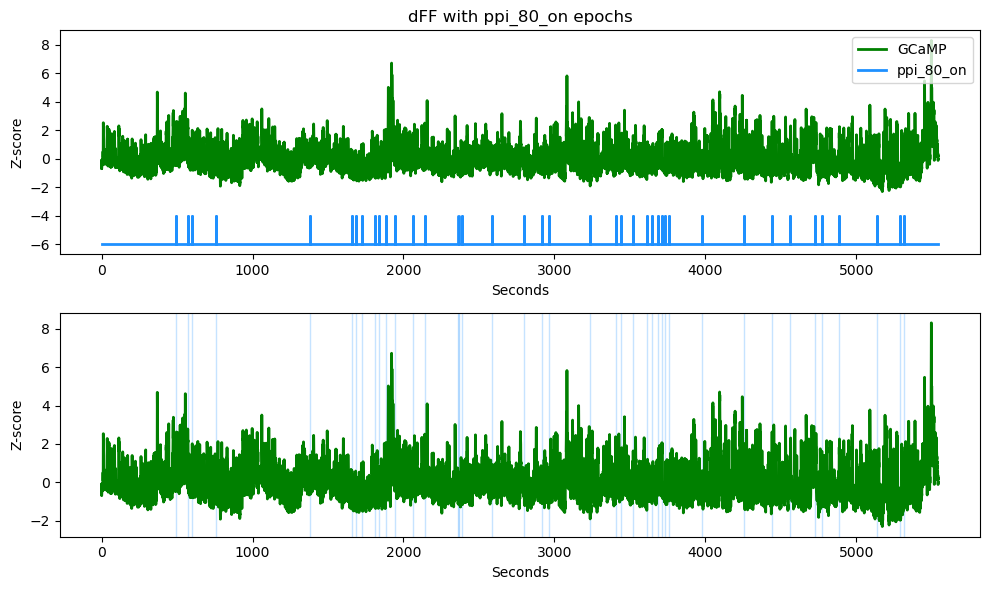

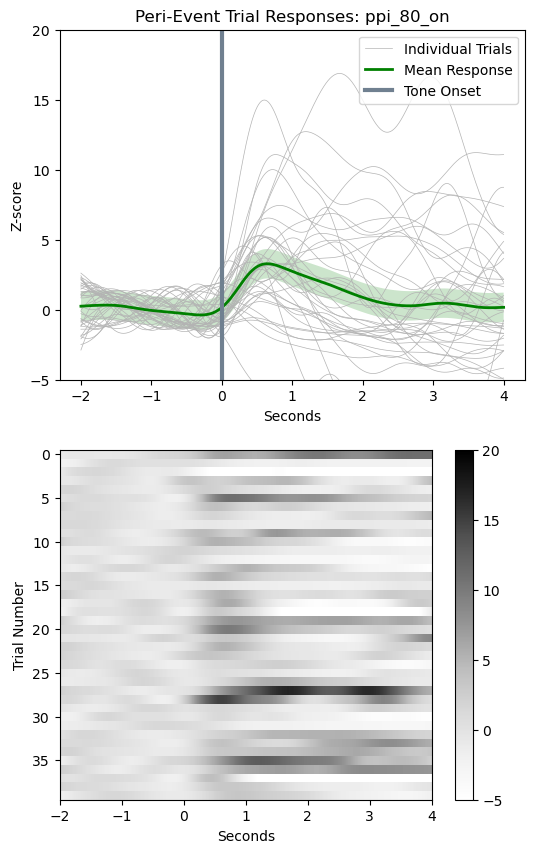

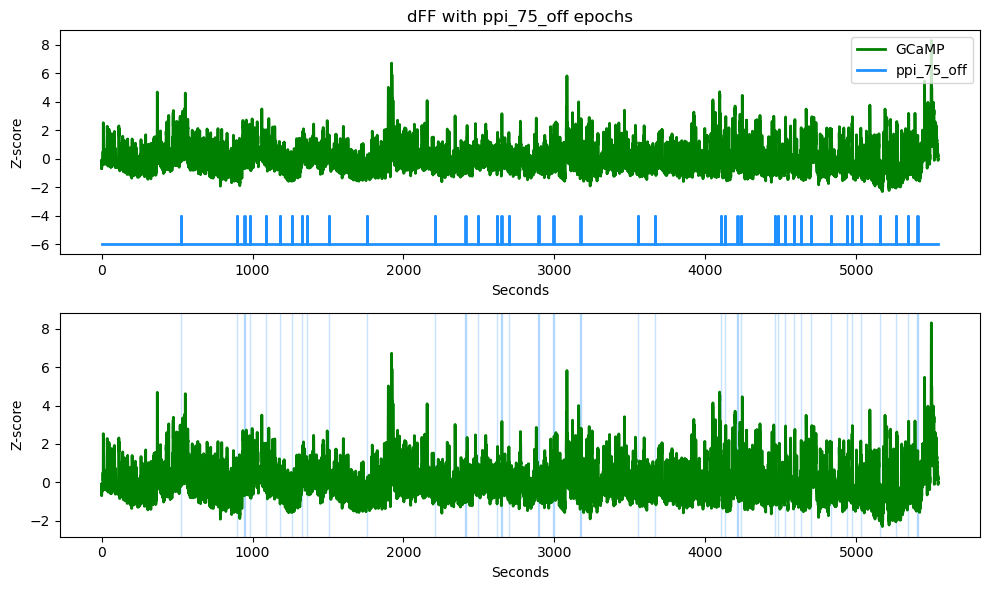

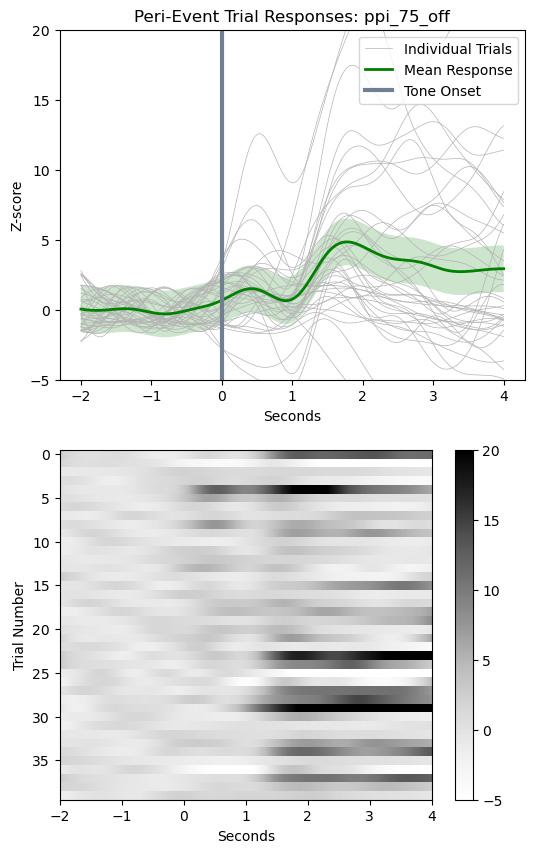

In [32]:
Session = 'PI'
sampling_rate = 1017.2526245117188
SaveData = True
SavePlot = True

for i, Animal_ID in enumerate(Animal_ID_list):
                if not os.path.exists(os.path.join(Base_folder, Batch_folder, Animal_ID, Session, 'Epoch_Analysis')):
                    os.makedirs(os.path.join(Base_folder, Batch_folder, Animal_ID, Session, 'Epoch_Analysis'))

                FileFunctions.Set_WD(os.path.join(Base_folder, Batch_folder, Animal_ID, Session,'Epoch_Analysis'))
                
                df_EPOC = pd.read_csv(os.path.join(Base_folder, Batch_folder, Animal_ID, Session, 'Epoch_Info', 'Data_EPOC.csv'))
                
                GCaMP_signal = pd.read_pickle(os.path.join(Base_folder, Batch_folder, Animal_ID, Session, 'Preprocessing', 'Final_table_raw_trace.pkl'))

                time = np.array(GCaMP_signal.time)
                dF_F = np.array(GCaMP_signal.value2) # The value is the dF/F or Z-score signal. The value2 is the denoised/detrended/body-movemnet corrected signal. The value3 is the raw signal. 
                ylim_bottom = -5 #np.quantile(dF_F, q=0.02)
                ylim_top = 20 #np.quantile(dF_F, q=0.995)

                for key in ppi_sequence_list:
                    # print(key)
                    # print(ppi_sequence_dic[key])
                    tone_on = [df_EPOC.onset[i] for i in ppi_sequence_dic[key]]
                    tone_off = [df_EPOC.offset[i] for i in ppi_sequence_dic[key]]
                    # Add the first and last time stamps to make tails on the TTL stream
                    tone_x = np.append(np.append(time[0], np.reshape(np.kron([tone_on, tone_off],
                                    np.array([[1], [1]])).T, [1,-1])[0]), time[-1])
                    sz = len(tone_on)
                    d = np.linspace(1, len(tone_on), len(tone_on))
                    d2 = np.full(d.shape, fill_value=1)
                    # Add zeros to beginning and end of 0,1 value array to match len of tone_x
                    tone_y = np.append(np.append(0,np.reshape(np.vstack([np.zeros(sz),
                        d2, d2, np.zeros(sz)]).T, [1, -1])[0]),0)

                    y_scale = 2 #adjust according to data needs
                    y_shift = -6 #scale and shift are just for asthetics

                    # First subplot in a series: dFF with lick epocs
                    fig1 = plt.figure(figsize=(10,6))
                    ax2 = fig1.add_subplot(211)

                    p1, = ax2.plot(GCaMP_signal.time, GCaMP_signal.value, linewidth=2, color='green', label='GCaMP')
                    p2, = ax2.plot(tone_x, y_scale*tone_y+y_shift, linewidth=2, color='dodgerblue', label = key)
                    ax2.set_ylabel(r'Z-score')
                    ax2.set_xlabel('Seconds')
                    ax2.set_title('dFF with {} epochs'.format(key))
                    ax2.legend(handles=[p1,p2], loc='upper right')
                    fig1.tight_layout()

                    ax4 = fig1.add_subplot(212)
                    p1, = ax4.plot(GCaMP_signal.time, GCaMP_signal.value, linewidth=2, color='green', label='GCaMP')
                    for on, off in zip(df_EPOC.onset[ppi_sequence_dic[key]], df_EPOC.offset[ppi_sequence_dic[key]]):
                        ax4.axvspan(on, off, alpha=0.25, color='dodgerblue')
                    ax4.set_ylabel(r'Z-score')
                    ax4.set_xlabel('Seconds')
                    # ax4.set_title('')
                    fig1.tight_layout()

                    if SavePlot == True:
                        plt.savefig('Plot_{}_epochs.png'.format(key))
                    
                    plt.show(fig1)
                    
                    
                    PRE_TIME = 2 # five seconds before event onset
                    POST_TIME = 4 # ten seconds after

                    # time span for peri-event filtering, PRE and POST, in samples
                    TRANGE = [-PRE_TIME*np.floor(sampling_rate), POST_TIME*np.floor(sampling_rate)]

                    dFF_snips = []
                    array_ind = []
                    pre_stim = []
                    post_stim = []

                    for on in [df_EPOC.onset[i] for i in ppi_sequence_dic[key]]:
                        # If the bout cannot include pre-time seconds before event, make zero
                        if on < PRE_TIME:
                            dFF_snips.append(np.zeros(TRANGE[1]-TRANGE[0]))
                        else: 
                            # find first time index after bout onset
                            array_ind.append(np.where(GCaMP_signal.time > on)[0][0])
                            # find index corresponding to pre and post stim durations
                            pre_stim.append(array_ind[-1] + TRANGE[0])
                            post_stim.append(array_ind[-1] + TRANGE[1])
                            onset_idx = np.where(GCaMP_signal.time < on)[0][-1]
                            # print(onset_idx)
                            dff = GCaMP_signal.value2[int(pre_stim[-1]):int(post_stim[-1])]
                            
                            # Getting the z-score using the mean and standard deviation of the baseline period
                            z_mean = np.mean(GCaMP_signal.value2[int(pre_stim[-1]):int(onset_idx)])
                            z_sd = np.std(GCaMP_signal.value2[int(pre_stim[-1]):int(onset_idx)])
                            dFF_snips.append((dff - z_mean)/z_sd)

                    # Make all snippets the same size based on min snippet length
                    min1 = np.min([np.size(x) for x in dFF_snips])
                    dFF_snips = [x[1:min1] for x in dFF_snips]

                    mean_dFF_snips = np.mean(dFF_snips, axis=0)
                    std_dFF_snips = np.std(mean_dFF_snips, axis=0)

                    peri_time = np.linspace(1, len(mean_dFF_snips), len(mean_dFF_snips))/sampling_rate - PRE_TIME

                    fig2 = plt.figure(figsize=(6,10))
                    ax5 = fig2.add_subplot(211)

                    for i, snip in enumerate(dFF_snips):
                        p1, = ax5.plot(peri_time, snip, linewidth=.5, color=[.7, .7, .7], label='Individual Trials')
                    p2, = ax5.plot(peri_time, mean_dFF_snips, linewidth=2, color='green', label='Mean Response')

                    # Plotting standard error bands
                    p3 = ax5.fill_between(peri_time, mean_dFF_snips+std_dFF_snips, 
                                        mean_dFF_snips-std_dFF_snips, facecolor='green', alpha=0.2)
                    p4 = ax5.axvline(x=0, linewidth=3, color='slategray', label='Tone Onset')

                    ax5.axis('tight')
                    ax5.set_xlabel('Seconds')
                    ax5.set_ylabel(r'Z-score')
                    ax5.set_ylim([ylim_bottom, ylim_top])
                    ax5.set_title('Peri-Event Trial Responses: {}'.format(key))
                    ax5.legend(handles=[p1, p2, p4], loc='upper right');
                    ax6 = fig2.add_subplot(212)
                    cs = ax6.imshow(dFF_snips, cmap=plt.cm.Greys, aspect='auto',
                                    interpolation='none', extent=[-PRE_TIME, POST_TIME, len(dFF_snips), 0],
                                    vmin=ylim_bottom, vmax=ylim_top)
                    ax6.set_xlabel('Seconds')
                    ax6.set_ylabel('Trial Number')
                    ax6.set_yticks(np.arange(.5, len(dFF_snips), 5))
                    ax6.set_yticklabels(np.arange(0, len(dFF_snips), 5))
                    fig2.colorbar(cs)
                    
                    if SavePlot == True:
                        plt.savefig('Plot_{}_peri_event.png'.format(key))

                    if SaveData == True:
                        # Convert dFF_snips to a 2D numpy array
                        dFF_snips_array = np.array([snip.values for snip in dFF_snips]).T
                        # Convert the numpy array to a pandas DataFrame
                        df_dFF_snips = pd.DataFrame(dFF_snips_array)
                        df_dFF_snips.to_csv('Data_{}_peri_event.csv'.format(key), index=False, header=False)
                        
                    plt.show(fig2)